In [1]:
import numpy as np
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
from nengo_spa.examine import pairs
from nengo_spa.exceptions import SpaParseError, SpaTypeError

rng = np.random.RandomState(1) # random number generator


# What is B?

In [3]:
d = 16
vocab = spa.Vocabulary(d, strict=False, pointer_gen=rng)

def stimulus_fn(t):
    if t < 0.5:
        return "A * B"  # Return string to be parsed
    elif t < 1.0:
        return vocab.parse("C * B")  # Return SemanticPointer instance
    else:
        return np.zeros(d)  # Return a numpy array

with spa.Network(seed=0) as model:
    state = spa.State(vocab)
    bind = spa.Bind(vocab)
    spa_input = spa.Transcode(stimulus_fn, output_vocab=vocab)

    # connect input to ensemble
    spa_input >> state
    # bind ensemble with question: what is B
    state >> bind.input_left
    ~spa.sym.B >> bind.input_right

    p = nengo.Probe(bind.output, synapse=0.03)

In [ ]:
with nengo.Simulator(model) as sim:
    sim.run(1.5)

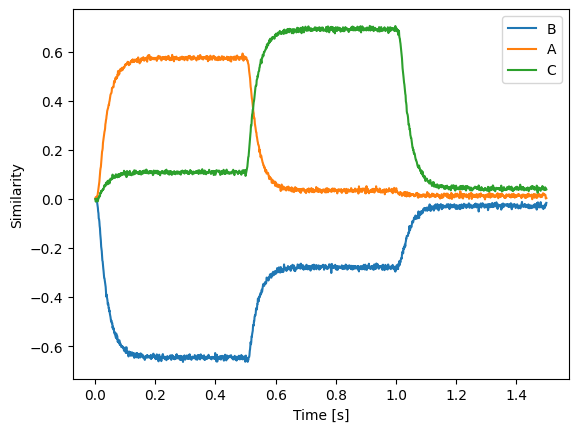

In [12]:
plt.plot(sim.trange(), spa.similarity(sim.data[p], vocab))
plt.xlabel("Time [s]")
plt.ylabel("Similarity")
plt.legend(vocab.keys(), loc="best")

# What is the question?

In [7]:
d = 64
with spa.Network(seed=0) as model:
    query = spa.Transcode(lambda t: "CIRCLE" if t < 0.25 else "SQUARE", output_vocab=d)
    result = spa.State(vocab=d)

    spa.sym("BLUE * CIRCLE + RED * SQUARE") * ~query >> result

    p = nengo.Probe(result.output, synapse=0.01)

In [8]:
with nengo.Simulator(model) as sim:
    sim.run(0.5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

/Users/beep/PycharmProjects/nengoPlayground/venv/lib/python3.8/site-packages/nengo/builder/optimizer.py:654: UserWarning: Skipping some optimization steps because SciPy is not installed. Installing SciPy may result in faster simulations.
  warnings.warn(


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

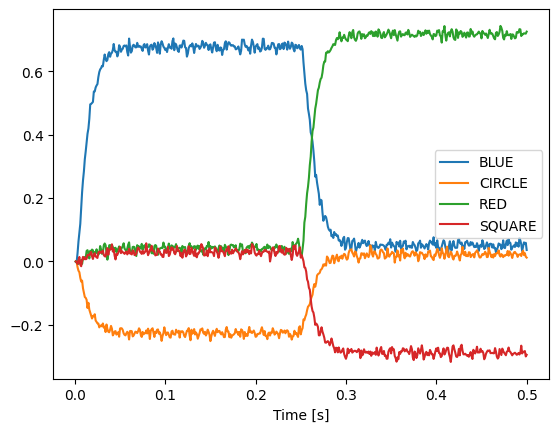

In [9]:
plt.plot(sim.trange(), spa.similarity(sim.data[p], result.vocab))
plt.xlabel("Time [s]")
plt.legend(result.vocab, loc="best")